<a href="https://colab.research.google.com/github/BenBlondeel-UCLL/Troy-ML/blob/master/Homework7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 121s 142ms/step - accuracy: 0.9056 - loss: 0.3268 - val_accuracy: 0.9868 - val_loss: 0.0513
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 139s 138ms/step - accuracy: 0.9871 - loss: 0.0421 - val_accuracy: 0.9863 - val_loss: 0.0456
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 140s 136ms/step - accuracy: 0.9898 - loss: 0.0299 - val_accuracy: 0.9892 - val_loss: 0.0384
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 114s 135ms/step - accuracy: 0.9941 - loss: 0.0183 - val_accuracy: 0.9910 - val_loss: 0.0286
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 143s 136ms/step - accuracy: 0.9952 - loss: 0.0142 - val_accuracy: 0.9938 - val_loss: 0.0262
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9870 - loss: 0.0408
MNIST Loss:  0.02869967743754387
MNIST Accuracy:  0.9908000230789185
MNIST Training time:  684.2452509403229
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 114s 135ms/step - accuracy: 0.7925 - loss: 0.6092 - val_accuracy: 0.8867 - val_loss: 0.3103
Epoch 2/5
844/844 ━━━━━━

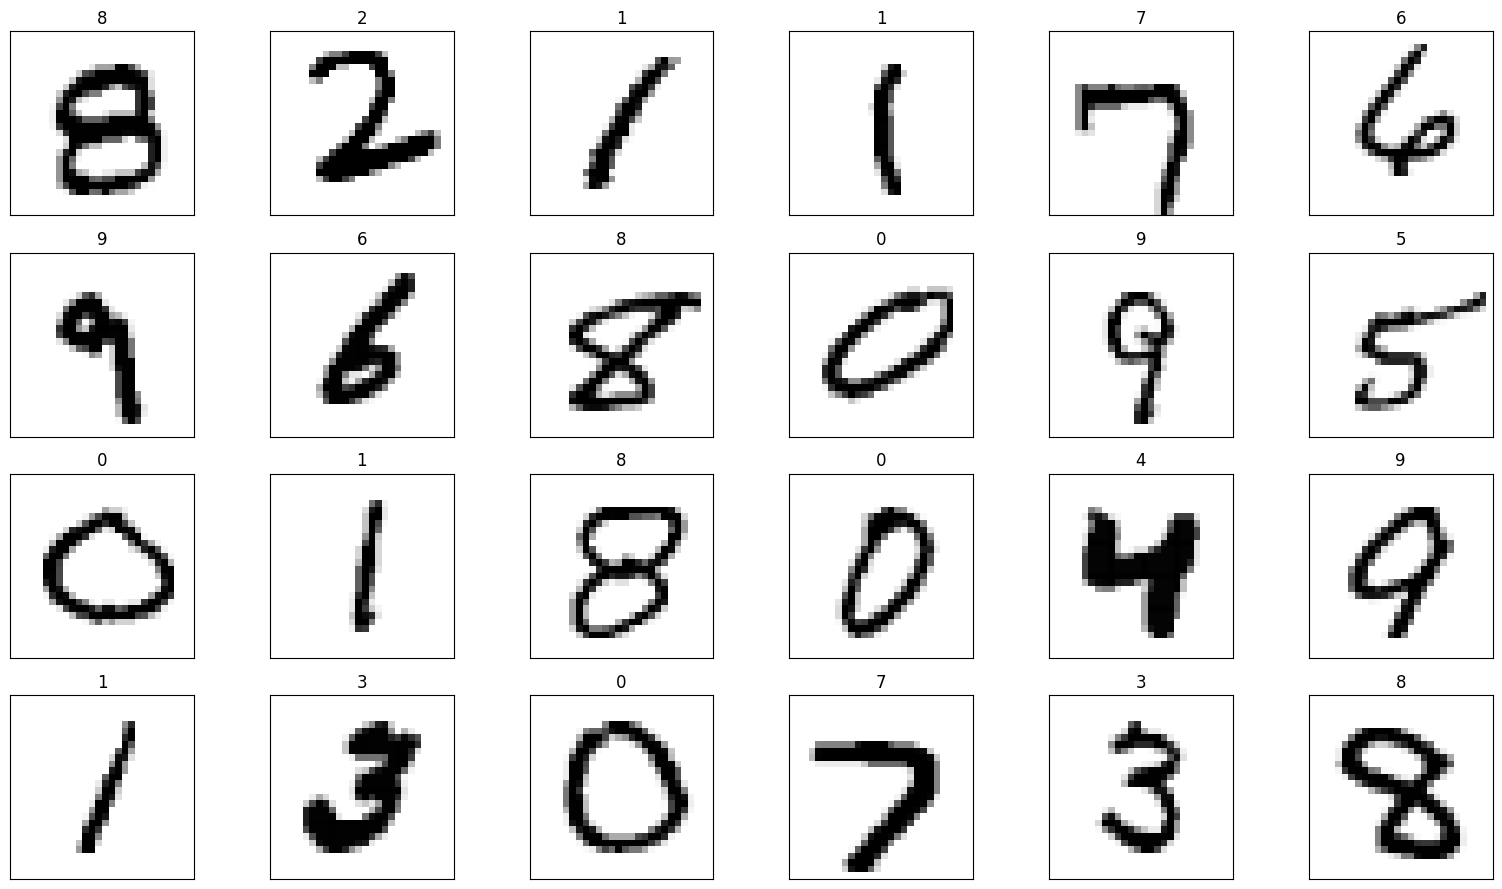

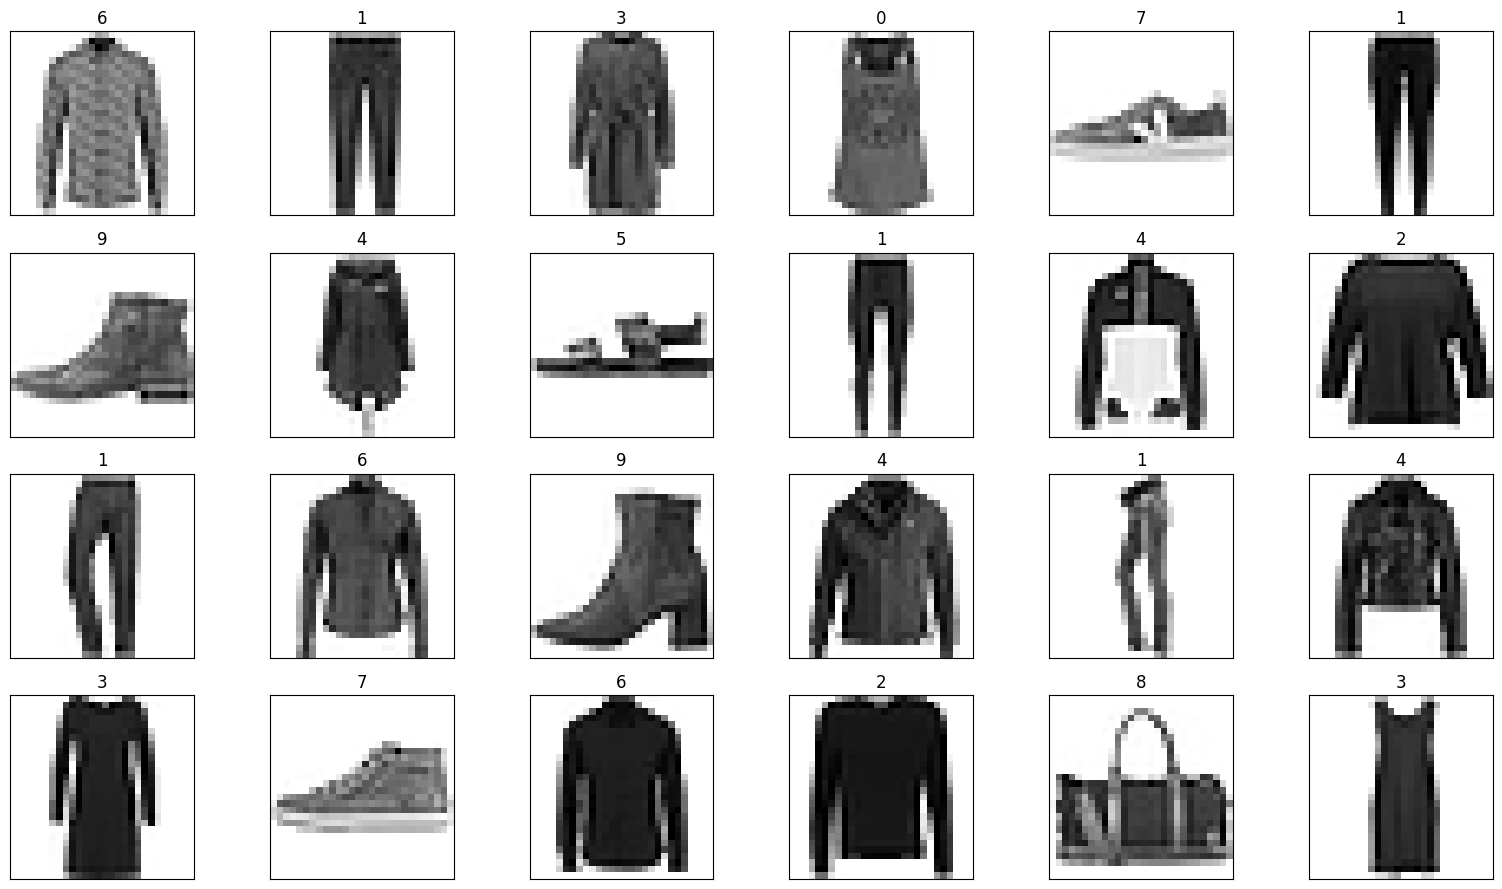

In [1]:
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#loading the datasets
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()
(X_train_fmnist, y_train_fmnist), (X_test_fmnist, y_test_fmnist) = fashion_mnist.load_data()

# vizualizing the datasets
index = np.random.choice(np.arange(len(X_train_mnist)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,9))

for item in zip(axes.ravel(), X_train_mnist[index], y_train_mnist[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)
plt.tight_layout()

index = np.random.choice(np.arange(len(X_train_fmnist)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,9))

for item in zip(axes.ravel(), X_train_fmnist[index], y_train_fmnist[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)
plt.tight_layout()

# preparing the data
X_train_mnist = X_train_mnist.reshape((60000, 28, 28, 1))
X_test_mnist = X_test_mnist.reshape((10000, 28, 28, 1))

X_train_fmnist = X_train_fmnist.reshape((60000, 28, 28, 1))
X_test_fmnist = X_test_fmnist.reshape((10000, 28, 28, 1))

# normalizing the data
X_train_mnist = X_train_mnist.astype('float32') / 255
X_test_mnist = X_test_mnist.astype('float32') / 255

X_train_fmnist = X_train_fmnist.astype('float32') / 255
X_test_fmnist = X_test_fmnist.astype('float32') / 255

# one-hot encoding the data (labels to int)
y_train_mnist = to_categorical(y_train_mnist)
y_test_mnist = to_categorical(y_test_mnist)

y_train_fmnist = to_categorical(y_train_fmnist)
y_test_fmnist = to_categorical(y_test_fmnist)

# creating the Neural Net
cnn = Sequential()
# adding layers
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

# model summary
print(cnn.summary())

# compiling the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# training the models and evaluating
time_start_mnist = time.time()
cnn.fit(X_train_mnist, y_train_mnist, epochs=5, batch_size=64, validation_split=0.1)
time_stop_mnist = time.time()
loss, accuracy = cnn.evaluate(X_test_mnist, y_test_mnist)
print("MNIST Loss: ", loss)
print("MNIST Accuracy: ", accuracy)
print("MNIST Training time: ", time_stop_mnist - time_start_mnist)

time_start_fmnist = time.time()
cnn.fit(X_train_fmnist, y_train_fmnist, epochs=5, batch_size=64, validation_split=0.1)
time_stop_fmnist = time.time()
loss, accuracy = cnn.evaluate(X_test_fmnist, y_test_fmnist)
print("FASHION_MNIST Loss: ", loss)
print("FASHION_MNIST Accuracy: ", accuracy)
print("FASHION MNIST Training time: ", time_stop_fmnist - time_start_fmnist)

**Answer how well does the model perform on Fashin-MNIST compared to MNIST? How do the training times compare?**

- The model performs significantly worse on the Fashin_MNIST dataset than on the MNIST dataset. Training time also took a bit longer.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4096)                │      13,111,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,711,498 (52.31 MB)

 Trainable params: 13,711,498 (52.31 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 402s 474ms/step - accuracy: 0.9183 - loss: 0.2573 - val_accuracy: 0.9880 - val_loss: 0.0444
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 440s 471ms/step - accuracy: 0.9878 - loss: 0.0395 - val_accuracy: 0.9893 - val_loss: 0.0380
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 441s 470ms/step - accuracy: 0.9924 - loss: 0.0258 - val_accuracy: 0.9897 - val_loss: 0.0382
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 441s 469ms/step - accuracy: 0.9936 - loss: 0.0196 - val_accuracy: 0.9903 - val_loss: 0.0370
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 443s 469ms/step - accuracy: 0.9956 - loss: 0.0133 - val_accuracy: 0.9890 - val_loss: 0.0424
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.9859 - loss: 0.0564
MNIST Loss with extra dense layer:  0.042731139808893204
MNIST Accuracy with extra dense layer:   0.9887999892234802
MNIST Training time with extra dense layer:  2211.5992691516876


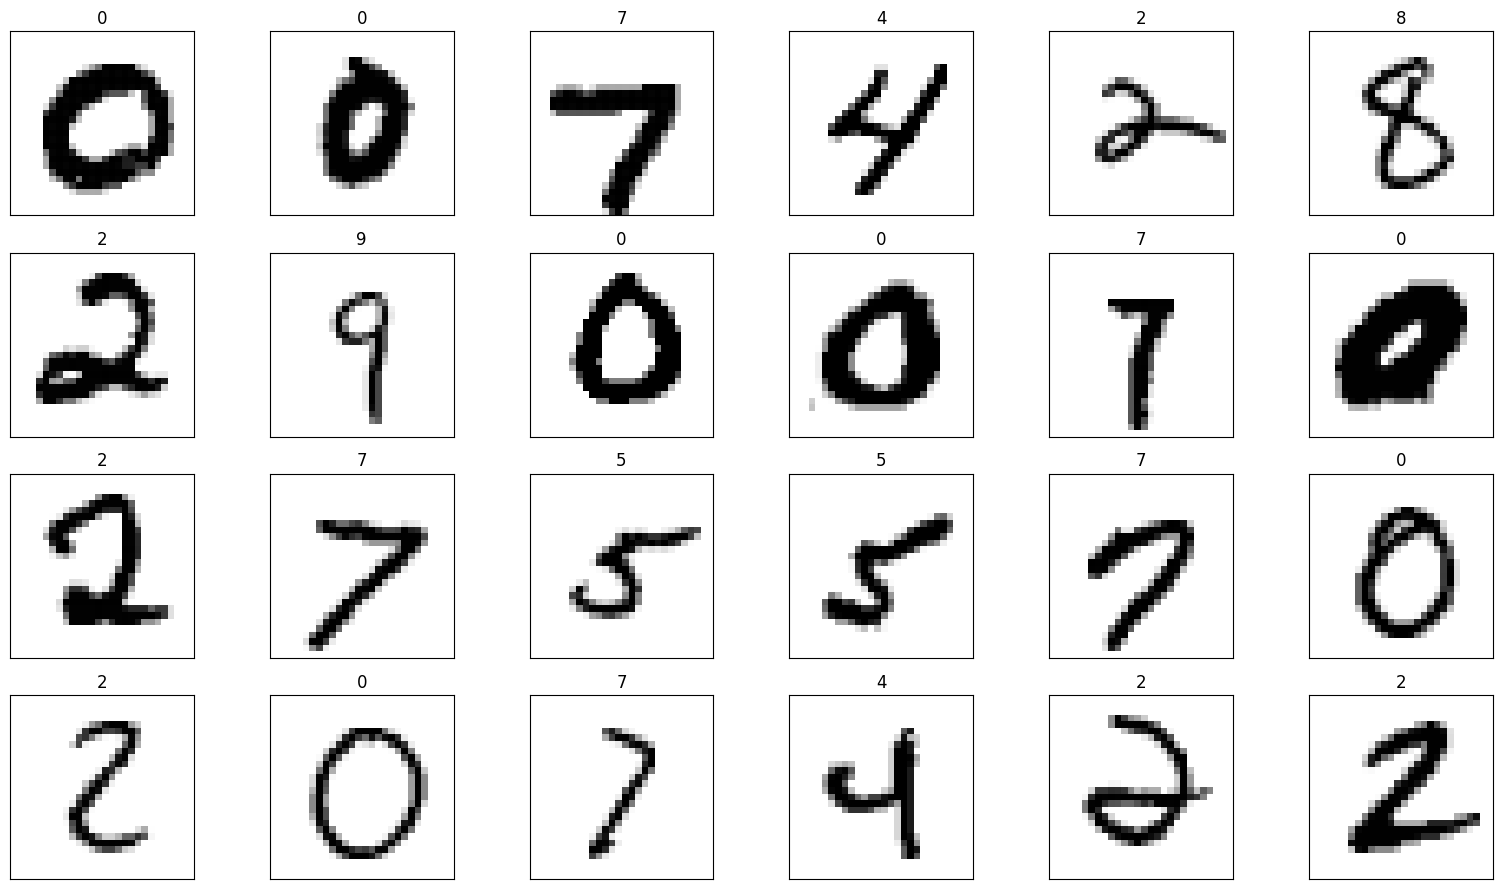

In [2]:
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#loading the datasets
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

# vizualizing the datasets
index = np.random.choice(np.arange(len(X_train_mnist)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,9))

for item in zip(axes.ravel(), X_train_mnist[index], y_train_mnist[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)
plt.tight_layout()

# preparing the data
X_train_mnist = X_train_mnist.reshape((60000, 28, 28, 1))
X_test_mnist = X_test_mnist.reshape((10000, 28, 28, 1))

# normalizing the data
X_train_mnist = X_train_mnist.astype('float32') / 255
X_test_mnist = X_test_mnist.astype('float32') / 255

# one-hot encoding the data (labels to int)
y_train_mnist = to_categorical(y_train_mnist)
y_test_mnist = to_categorical(y_test_mnist)

# creating the Neural Net
cnn = Sequential()
# adding layers
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=4096, activation='relu'))
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

# model summary
print(cnn.summary())

# compiling the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# training the models and evaluating
time_start_mnist = time.time()
cnn.fit(X_train_mnist, y_train_mnist, epochs=5, batch_size=64, validation_split=0.1)
time_stop_mnist = time.time()
loss, accuracy = cnn.evaluate(X_test_mnist, y_test_mnist)
print("MNIST Loss with extra dense layer: ", loss)
print("MNIST Accuracy with extra dense layer:  ", accuracy)
print("MNIST Training time with extra dense layer: ", time_stop_mnist - time_start_mnist)

**16.4 on page 714. If you add another Dense layer with 4096 neurons, how does this change the prediction accuracy and speed?**

 - This segnificantly decreases the speed and some accuracy.